In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics      
from sklearn.metrics import r2_score

In [82]:
cds=pd.read_csv('/content/car data.csv')

In [83]:
cds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [84]:
cds.shape

(301, 9)

In [85]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [86]:
cds.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [87]:
cds['Years_old'] = 2023 - cds.Year
cds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [88]:
cds.drop('Year' , axis=1 ,inplace = True)
cds.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [89]:
# cds = pd.get_dummies(cds, drop_first=True)
# # cds.replace({'Fual_Type' : {'Petrol' :0 ,'Diesel' : 1}} ,inplace = True)

In [90]:
cds['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [91]:
cds['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [92]:
cds['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [93]:
cds['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [94]:
cds['Owner'].unique()

array([0, 1, 3])

In [95]:
cds['Car_Name']

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object

In [96]:
cds.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,9.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,5.000000
25%,0.900000,1.200000,15000.000000,0.000000,7.000000
50%,3.600000,6.400000,32000.000000,0.000000,9.000000
75%,6.000000,9.900000,48767.000000,0.000000,11.000000
max,35.000000,92.600000,500000.000000,3.000000,20.000000


In [97]:
X=cds.drop('Selling_Price', axis = 1)
y = cds['Selling_Price']
# print(x.shape)
# print(y.shape)

In [98]:
X

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,city,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,12.50,9000,Diesel,Dealer,Manual,0,6


In [99]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [102]:
ohe=OneHotEncoder()
ohe.fit(X[['Car_Name','Fuel_Type','Seller_Type','Transmission']])

OneHotEncoder()

In [103]:
ohe.categories_

[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
        'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
        'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
        'Bajaj Avenger Street 220', 'Bajaj Discover 100',
        'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
        'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
        'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
        'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
        'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
        'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
        'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
        'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
        'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
        'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
        'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',


In [104]:
column_trans =make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_Name','Fuel_Type','Seller_Type','Transmission']),remainder='passthrough')


In [105]:
rf= RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
pipe=make_pipeline(column_trans,rf)
pipe.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Baj...
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Seller_Type',
                                                   'Transmission'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='auto',
                                       n_estimators=120))])

In [106]:
y_pred=pipe.predict(X_test)

In [107]:
y_pred

array([ 6.84      ,  0.49408333,  4.66666667,  8.68416667, 13.35383333,
        5.25791667,  3.18458333,  0.43883333,  3.96833333,  4.86083333,
        2.995     ,  0.76916667,  4.8125    ,  7.039     ,  7.7525    ,
       13.44883333,  6.47291667,  3.98083333,  0.42375   ,  1.57458333,
        2.91083333,  5.00375   ,  5.4775    , 11.064     ,  0.16791667,
        0.72941667,  0.32475   ,  0.7205    ,  0.47666667,  4.28975   ,
        2.50658333,  5.92708333,  0.49525   ,  7.48741667,  3.3495    ,
        1.17808333,  5.69458333,  5.35583333,  0.21258333,  6.90166667,
        7.80108333, 23.36875   ,  4.93208333,  4.55291667,  5.65708333,
       11.33508333,  0.22891667,  0.77283333,  5.31833333,  6.70125   ,
        7.35541667,  3.13083333,  5.42041667, 24.59166667,  1.18925   ,
        1.12208333,  0.47108333,  2.71583333,  3.62458333,  2.31675   ,
        3.97058333])

In [108]:
pipe.score(X_test,y_test)#before



0.9374176978071581

In [109]:
r2_score(y_test,y_pred)

0.9374176978071581

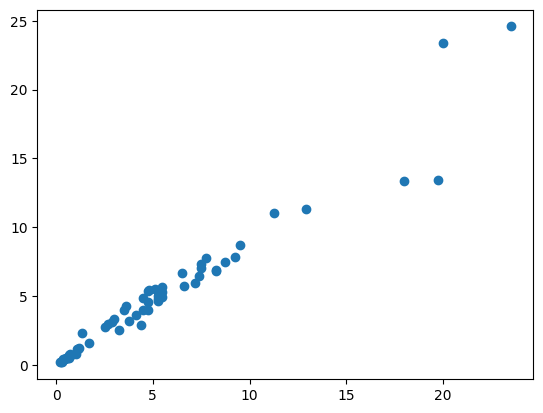

In [110]:
plt.scatter(y_test,y_pred)


In [111]:
import pickle
with open('new_model_cp.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(pipe, file)

In [112]:
# model = pickle.load(open('/content/RF_price_predicting_model.pkl' , 'rb'))

In [113]:
# ritz	5.59	27000	Petrol	Dealer	Manual	0	9

pipe.predict(pd.DataFrame([['ritz',5.59 , 27000 ,'Petrol','Dealer','Manual',0,9]],columns=['Car_Name',	'Present_Price' ,	'Kms_Driven' ,	'Fuel_Type' ,	'Seller_Type' ,	'Transmission' ,	'Owner' ,	'Years_old']))

array([3.81958333])